## "I (We) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work."

# Part 1: In this part we will work on Income dataset. You have to achieve a minimum accuracy of 82% Take guidance from the steps mentioned below.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
from matplotlib.ticker import FuncFormatter

import seaborn as sns

import numpy as np
import pandas as pd
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.express as px

## 1) Load, preprocess, analyze the dataset and make it ready for training. You can refer to Assignment 2: Part 1 - Data Analysis steps. Applying the right preprocessing techniques can help you increase the accuracy.

In [288]:
incomeData = pd.read_csv('income_dataset.csv')

In [289]:
incomeData.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256000e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897801e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055511e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178242e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [290]:
incomeData.shape

(32561, 13)

In [291]:
incomeData.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053.0,HS-grad,9,Widowed,?,Not-in-family,0,4356,40,United-States,<=50K
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
2,66,?,NaN,Some-college,10,Widowed,?,Unmarried,0,4356,40,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K


<AxesSubplot:ylabel='income'>

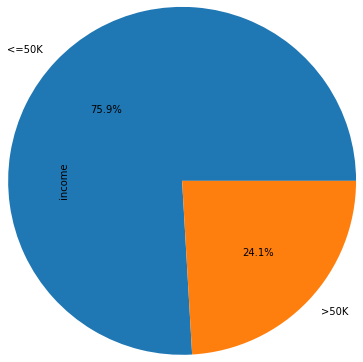

In [292]:
incomeData['income'].value_counts().plot(kind = 'pie',radius=2, autopct='%1.1f%%')

Text(0.5, 1.0, 'Distribution of people with different education backgrounds')

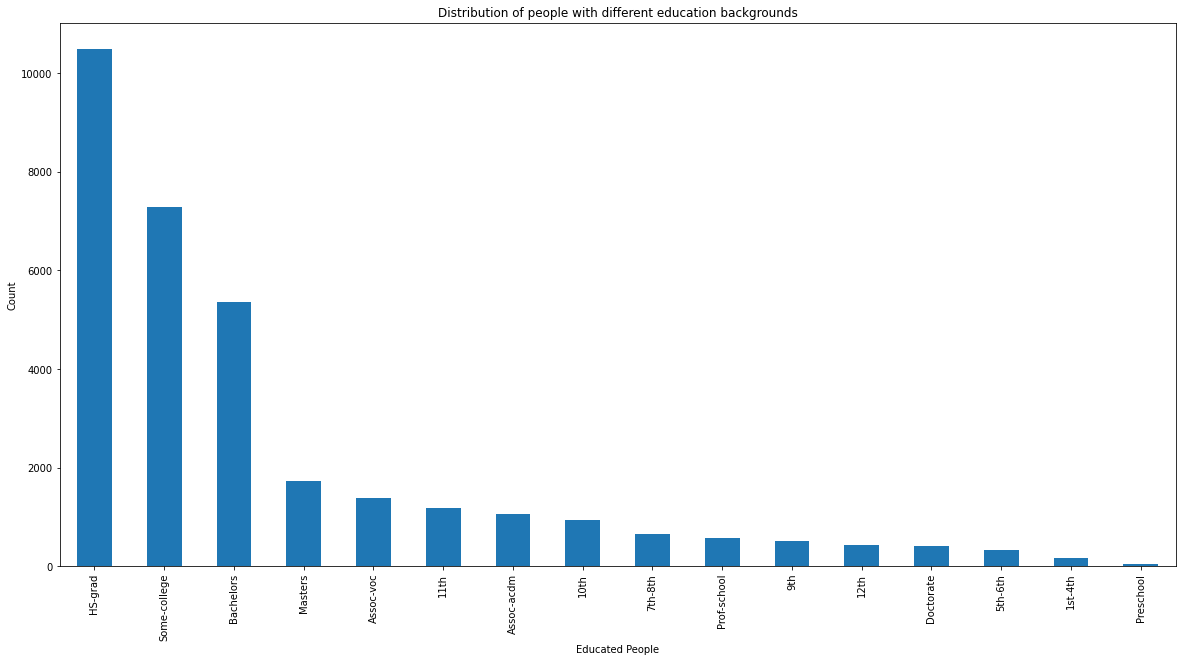

In [293]:
plt.figure(figsize=(20, 10))
incomeData['education'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Educated People')
plt.title('Distribution of people with different education backgrounds')

Text(0.5, 1.0, 'Distribution of people with different age groups')

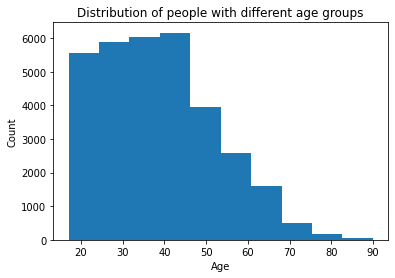

In [294]:
plt.hist(incomeData.age)
plt.ylabel('Count')
plt.xlabel('Age')
plt.title('Distribution of people with different age groups')

In [295]:
incomeData = incomeData.rename(columns={"marital.status":"marital","native.country":"native"})
incomeData.dtypes

age                 int64
workclass          object
fnlwgt            float64
education          object
education.num       int64
marital            object
occupation         object
relationship       object
capital.gain        int64
capital.loss        int64
hours.per.week      int64
native             object
income             object
dtype: object

In [296]:
incomeData['workclass'] = pd.Categorical(incomeData.workclass)
incomeData['education'] = pd.Categorical(incomeData.education)
incomeData['marital'] = pd.Categorical(incomeData.marital)
incomeData['occupation'] = pd.Categorical(incomeData.occupation)
incomeData['relationship'] = pd.Categorical(incomeData.relationship)
incomeData['native'] = pd.Categorical(incomeData.native)
incomeData['income'] = pd.Categorical(incomeData.income)

In [297]:
incomeData.dtypes

age                  int64
workclass         category
fnlwgt             float64
education         category
education.num        int64
marital           category
occupation        category
relationship      category
capital.gain         int64
capital.loss         int64
hours.per.week       int64
native            category
income            category
dtype: object

In [298]:
incomeData.isnull().sum()

age               0
workclass         0
fnlwgt            1
education         0
education.num     0
marital           0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
native            0
income            0
dtype: int64

In [299]:
trainData = incomeData.dropna(axis=0)
trainData.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital           0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
native            0
income            0
dtype: int64

In [300]:
trainData.shape[0]
df = trainData

In [301]:
delRows = df[df.isin(['?']).any(axis=1)]
finalDelRows = []
print(delRows)

       age workclass    fnlwgt     education  education.num  \
0       90         ?   77053.0       HS-grad              9   
9       41   Private   70037.0  Some-college             10   
14      51         ?  172175.0     Doctorate             16   
18      22   Private  119592.0    Assoc-acdm             12   
24      61         ?  135285.0       HS-grad              9   
...    ...       ...       ...           ...            ...   
32533   35         ?  320084.0     Bachelors             13   
32534   30         ?   33811.0     Bachelors             13   
32541   71         ?  287372.0     Doctorate             16   
32543   41         ?  202822.0       HS-grad              9   
32544   72         ?  129912.0       HS-grad              9   

                  marital         occupation   relationship  capital.gain  \
0                 Widowed                  ?  Not-in-family             0   
9           Never-married       Craft-repair      Unmarried             0   
14          

In [302]:
i = df[df.isin(['?']).any(axis=1)].index
df.drop(i)
trainData = df

In [303]:
trainData.head()

,age,workclass,fnlwgt,education,education.num,marital,occupation,relationship,capital.gain,capital.loss,hours.per.week,native,income
0,90,?,77053.0,HS-grad,9,Widowed,?,Not-in-family,0,4356,40,United-States,<=50K
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K
5,34,Private,216864.0,HS-grad,9,Divorced,Other-service,Unmarried,0,3770,45,United-States,<=50K


In [304]:
age = trainData["age"]
workclass = trainData["workclass"]
fnlwgt = trainData["fnlwgt"]
education = trainData["education"]
educationNum = trainData["education.num"]
marital = trainData["marital"]
occupation = trainData["occupation"]
relationship = trainData["relationship"]
capitalGain = trainData["capital.gain"]
capitalLoss = trainData["capital.loss"]
hoursPerWeek = trainData["hours.per.week"]
native = trainData["native"]
income = trainData["income"]

In [305]:
trainData.dtypes

age                  int64
workclass         category
fnlwgt             float64
education         category
education.num        int64
marital           category
occupation        category
relationship      category
capital.gain         int64
capital.loss         int64
hours.per.week       int64
native            category
income            category
dtype: object

In [306]:
trainData = pd.get_dummies(trainData, columns = ['workclass', 'education', 'marital', 'occupation','relationship','native'])

In [307]:
trainData.dtypes

age                         int64
fnlwgt                    float64
education.num               int64
capital.gain                int64
capital.loss                int64
                           ...   
native_Thailand             uint8
native_Trinadad&Tobago      uint8
native_United-States        uint8
native_Vietnam              uint8
native_Yugoslavia           uint8
Length: 102, dtype: object

In [313]:
x = trainData.drop(['income'], axis=1)
y = trainData['income']

In [325]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [326]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_train = x_train.astype(np.float32)
x_test = sc.transform(x_test)
x_test = x_test.astype(np.float32)
y_train = y_train.replace({'>50K':0, '<=50K':1})
y_test = y_test.replace({'>50K':0, '<=50K':1})

## 2) Build and train a basic NN(with max 3 hidden layers).

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

In [3]:
# Hyperparameters
xtrain = torch.from_numpy(x_train)
ytrain = torch.tensor(y_train.values)
xtest = torch.from_numpy(x_test)
ytest = torch.tensor(y_test.values)
InputSize = x_train.shape[1]
hiddenSize = 20
numClasses = 2
numEpisodes = 1000
batchSize = 100
learningRate = 0.1

NameError: name 'x_train' is not defined

In [329]:
class NeuralNet(nn.Module):
    def __init__(self, InputSize, hiddenSize, numClasses):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(InputSize, hiddenSize)   
        self.out = nn.Linear(hiddenSize, numClasses)  

    def forward(self, x):
        x = nn.functional.relu(self.hidden(x))    
        x = self.out(x)
        return x

In [330]:
model = NeuralNet(InputSize,hiddenSize, numClasses)
optimizer = torch.optim.SGD(model.parameters(), lr = learningRate)
loss = nn.CrossEntropyLoss()

In [331]:
accuracy_list = []
loss_list = []
for episode in range(numEpisodes):
    out = model(xtrain)         
    lss = loss(out, ytrain)     

    optimizer.zero_grad()   
    lss.backward()
    optimizer.step()
    
    prediction = torch.max(out, 1)[1]
    pred_y = prediction.data.numpy()
    target_y = ytrain.data.numpy()
    accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
    
    accuracy_list.append(accuracy)
    loss_list.append(lss.detach().numpy())
    
print("Train Accuracy:",accuracy)

Train Accuracy: 0.8563037469287469


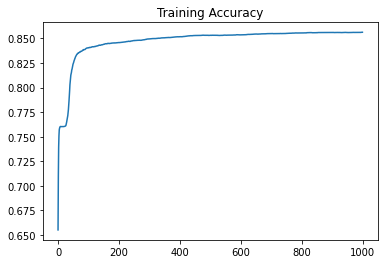

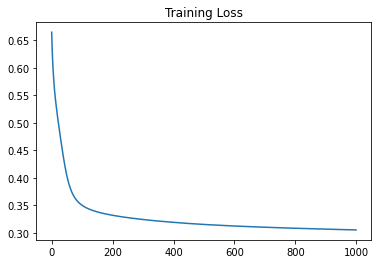

In [332]:
plt.plot(accuracy_list)
plt.title('Training Accuracy')
plt.show()

plt.plot(loss_list) 
plt.title('Training Loss')
plt.show()

## 3) Test your NN on the testing dataset.

In [333]:
accuracy_list_test = []
loss_list_test = []
for episode in range(numEpisodes):
    out = model(xtest)         
    lss = loss(out, ytest)     
    
    optimizer.zero_grad()   
    lss.backward()
    optimizer.step()

    prediction = torch.max(out, 1)[1]
    pred_y = prediction.data.numpy()
    target_y = ytest.data.numpy()
    accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
    
    accuracy_list_test.append(accuracy)
    loss_list_test.append(lss.detach().numpy())
    
print("Test Accuracy:",accuracy)

Test Accuracy: 0.8805282555282555


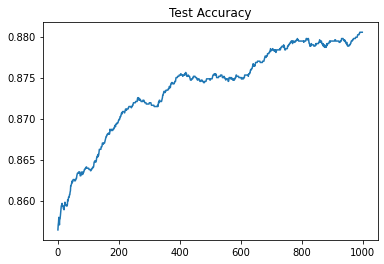

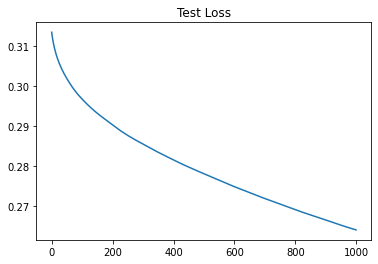

In [334]:
plt.plot(accuracy_list_test)
plt.title('Test Accuracy')
plt.show()

plt.plot(loss_list_test) 
plt.title('Test Loss')
plt.show()

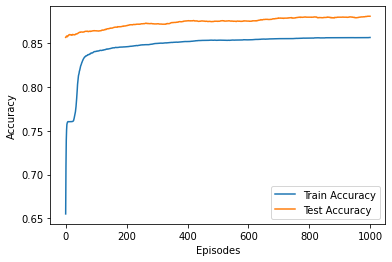

In [335]:
plt.plot(accuracy_list, label="Train Accuracy")
plt.plot(accuracy_list_test, label="Test Accuracy")
plt.xlabel("Episodes")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

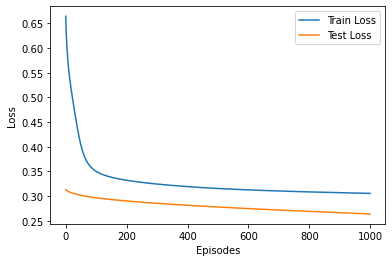

In [336]:
plt.plot(loss_list, label="Train Loss")
plt.plot(loss_list_test, label="Test Loss")
plt.xlabel("Episodes")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Part 2: Based on your NN model defined in Part I, play with various hyperparameters and different tools to increase the accuracy. Try various setups and draw conclusions.

## 1) Choose one hyper parameter to modify (e.g.Dropout). Fix the NN structure and all other parameters, and change values only for your chosen hyperparameter.
## 2) Choose another hyper parameter and Go to step 1. Do the same procedure for 3 hyperparameters. You can extend the list of hyperparameters, if needed.

In [386]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [387]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_train = x_train.astype(np.float32)
x_test = sc.transform(x_test)
x_test = x_test.astype(np.float32)
y_train = y_train.replace({'>50K':0, '<=50K':1})
y_test = y_test.replace({'>50K':0, '<=50K':1})

In [388]:
xtrain = torch.from_numpy(x_train)
ytrain = torch.tensor(y_train.values)
xtest = torch.from_numpy(x_test)
ytest = torch.tensor(y_test.values)
InputSize = x_train.shape[1]

hiddenSize = 20
numClasses = 2
numEpisodes = 1000
batchSize = 100
learningRate = [0.1, 0.01, 0.001]
optimizer_list = [torch.optim.Adam, torch.optim.SGD, torch.optim.AdamW]
activation = [nn.functional.relu, nn.functional.softmax, nn.functional.leaky_relu]
accuracy_per_model = []
accuracy_per_model_graph = []

### 1) Changing Activation: Activation Function -> ReLU, Optimizer -> Adam, Learning Rate -> 0.01

In [389]:
class NeuralNet(nn.Module):
    def __init__(self, InputSize, hiddenSize, numClasses):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(InputSize, hiddenSize)   
        self.out = nn.Linear(hiddenSize, numClasses)  

    def forward(self, x):
        x = activation[0](self.hidden(x))    
        x = self.out(x)
        return x
    
model = NeuralNet(InputSize,hiddenSize, numClasses)
optimizer = optimizer_list[0](model.parameters(), lr = learningRate[1])
loss = nn.CrossEntropyLoss()

accuracy_list = []
loss_list = []
for episode in range(numEpisodes):
    out = model(xtrain)         
    lss = loss(out, ytrain)     

    optimizer.zero_grad()   
    lss.backward()
    optimizer.step()
    
    prediction = torch.max(out, 1)[1]
    pred_y = prediction.data.numpy()
    target_y = ytrain.data.numpy()
    accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
    
    accuracy_list.append(accuracy)
    loss_list.append(lss.detach().numpy())
    
accuracy_per_model.append(accuracy)
accuracy_per_model_graph.append(accuracy_list)

### 2) Changing Activation: Activation Function -> Softmax, Optimizer -> Adam, Learning Rate -> 0.01

In [390]:
class NeuralNet(nn.Module):
    def __init__(self, InputSize, hiddenSize, numClasses):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(InputSize, hiddenSize)   
        self.out = nn.Linear(hiddenSize, numClasses)  

    def forward(self, x):
        x = activation[1](self.hidden(x))    
        x = self.out(x)
        return x
    
model = NeuralNet(InputSize,hiddenSize, numClasses)
optimizer = optimizer_list[0](model.parameters(), lr = learningRate[1])
loss = nn.CrossEntropyLoss()

accuracy_list = []
loss_list = []
for episode in range(numEpisodes):
    out = model(xtrain)         
    lss = loss(out, ytrain)     

    optimizer.zero_grad()   
    lss.backward()
    optimizer.step()
    
    prediction = torch.max(out, 1)[1]
    pred_y = prediction.data.numpy()
    target_y = ytrain.data.numpy()
    accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
    
    accuracy_list.append(accuracy)
    loss_list.append(lss.detach().numpy())
    
accuracy_per_model.append(accuracy)
accuracy_per_model_graph.append(accuracy_list)

/Users/volkopat/opt/anaconda3/envs/py2/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



### 3) Changing Activation: Activation Function -> Leaky ReLU, Optimizer -> Adam, Learning Rate -> 0.01

In [391]:
class NeuralNet(nn.Module):
    def __init__(self, InputSize, hiddenSize, numClasses):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(InputSize, hiddenSize)   
        self.out = nn.Linear(hiddenSize, numClasses)  

    def forward(self, x):
        x = activation[2](self.hidden(x))    
        x = self.out(x)
        return x
    
model = NeuralNet(InputSize,hiddenSize, numClasses)
optimizer = optimizer_list[0](model.parameters(), lr = learningRate[1])
loss = nn.CrossEntropyLoss()

accuracy_list = []
loss_list = []
for episode in range(numEpisodes):
    out = model(xtrain)         
    lss = loss(out, ytrain)     

    optimizer.zero_grad()   
    lss.backward()
    optimizer.step()
    
    prediction = torch.max(out, 1)[1]
    pred_y = prediction.data.numpy()
    target_y = ytrain.data.numpy()
    accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
    
    accuracy_list.append(accuracy)
    loss_list.append(lss.detach().numpy())
    
accuracy_per_model.append(accuracy)
accuracy_per_model_graph.append(accuracy_list)

### 4) Changing Optimizer: Activation Function -> Softmax, Optimizer -> SGD, Learning Rate -> 0.01

In [392]:
class NeuralNet(nn.Module):
    def __init__(self, InputSize, hiddenSize, numClasses):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(InputSize, hiddenSize)   
        self.out = nn.Linear(hiddenSize, numClasses)  

    def forward(self, x):
        x = activation[1](self.hidden(x))    
        x = self.out(x)
        return x
    
model = NeuralNet(InputSize,hiddenSize, numClasses)
optimizer = optimizer_list[1](model.parameters(), lr = learningRate[1])
loss = nn.CrossEntropyLoss()

accuracy_list = []
loss_list = []
for episode in range(numEpisodes):
    out = model(xtrain)         
    lss = loss(out, ytrain)     

    optimizer.zero_grad()   
    lss.backward()
    optimizer.step()
    
    prediction = torch.max(out, 1)[1]
    pred_y = prediction.data.numpy()
    target_y = ytrain.data.numpy()
    accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
    
    accuracy_list.append(accuracy)
    loss_list.append(lss.detach().numpy())
    
accuracy_per_model.append(accuracy)
accuracy_per_model_graph.append(accuracy_list)

/Users/volkopat/opt/anaconda3/envs/py2/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



### 5) Changing Optimizer: Activation Function -> Softmax, Optimizer -> AdamW, Learning Rate -> 0.01

In [393]:
class NeuralNet(nn.Module):
    def __init__(self, InputSize, hiddenSize, numClasses):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(InputSize, hiddenSize)   
        self.out = nn.Linear(hiddenSize, numClasses)  

    def forward(self, x):
        x = activation[1](self.hidden(x))    
        x = self.out(x)
        return x
    
model = NeuralNet(InputSize,hiddenSize, numClasses)
optimizer = optimizer_list[2](model.parameters(), lr = learningRate[1])
loss = nn.CrossEntropyLoss()

accuracy_list = []
loss_list = []
for episode in range(numEpisodes):
    out = model(xtrain)         
    lss = loss(out, ytrain)     

    optimizer.zero_grad()   
    lss.backward()
    optimizer.step()
    
    prediction = torch.max(out, 1)[1]
    pred_y = prediction.data.numpy()
    target_y = ytrain.data.numpy()
    accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
    
    accuracy_list.append(accuracy)
    loss_list.append(lss.detach().numpy())
    
accuracy_per_model.append(accuracy)
accuracy_per_model_graph.append(accuracy_list)

/Users/volkopat/opt/anaconda3/envs/py2/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



### 6) Changing Learning Rate: Activation Function -> Softmax, Optimizer -> AdamW, Learning Rate -> 0.001

In [395]:
class NeuralNet(nn.Module):
    def __init__(self, InputSize, hiddenSize, numClasses):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(InputSize, hiddenSize)   
        self.out = nn.Linear(hiddenSize, numClasses)  

    def forward(self, x):
        x = activation[0](self.hidden(x))    
        x = self.out(x)
        return x
    
model = NeuralNet(InputSize,hiddenSize, numClasses)
optimizer = optimizer_list[2](model.parameters(), lr = learningRate[1])
loss = nn.CrossEntropyLoss()

accuracy_list = []
loss_list = []
for episode in range(numEpisodes):
    out = model(xtrain)         
    lss = loss(out, ytrain)     

    optimizer.zero_grad()   
    lss.backward()
    optimizer.step()
    
    prediction = torch.max(out, 1)[1]
    pred_y = prediction.data.numpy()
    target_y = ytrain.data.numpy()
    accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
    
    accuracy_list.append(accuracy)
    loss_list.append(lss.detach().numpy())
    
accuracy_per_model.append(accuracy)
accuracy_per_model_graph.append(accuracy_list)

### 7) Changing Learning Rate: Activation Function -> Softmax, Optimizer -> AdamW, Learning Rate -> 0.1

In [396]:
class NeuralNet(nn.Module):
    def __init__(self, InputSize, hiddenSize, numClasses):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(InputSize, hiddenSize)   
        self.out = nn.Linear(hiddenSize, numClasses)  

    def forward(self, x):
        x = activation[2](self.hidden(x))    
        x = self.out(x)
        return x
    
model = NeuralNet(InputSize,hiddenSize, numClasses)
optimizer = optimizer_list[2](model.parameters(), lr = learningRate[1])
loss = nn.CrossEntropyLoss()

accuracy_list = []
loss_list = []
for episode in range(numEpisodes):
    out = model(xtrain)         
    lss = loss(out, ytrain)     

    optimizer.zero_grad()   
    lss.backward()
    optimizer.step()
    
    prediction = torch.max(out, 1)[1]
    pred_y = prediction.data.numpy()
    target_y = ytrain.data.numpy()
    accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
    
    accuracy_list.append(accuracy)
    loss_list.append(lss.detach().numpy())
    
accuracy_per_model.append(accuracy)
accuracy_per_model_graph.append(accuracy_list)

In [398]:
# class NeuralNet(nn.Module):
#     def __init__(self, InputSize, hiddenSize, numClasses, activation):
#         super(NeuralNet, self).__init__()
#         self.hidden = nn.Linear(InputSize, hiddenSize)   
#         self.out = nn.Linear(hiddenSize, numClasses)  

#     def forward(self, x):
#         x = activation[i](self.hidden(x))    
#         x = self.out(x)
#         return x

In [399]:
# models = []
# optimizers = []
# for i in range(len(activation)):
#     model = NeuralNet(InputSize,hiddenSize, numClasses, activation[i])
#     models.append(model)
# for i in range(len(optimizer_list)):
#     for j in range(len(learningRate)):
#         optimizer = optimizer_list[i](model.parameters(), lr = learningRate[j])
#         optimizers.append([optimizer_list[i], learningRate[j], optimizer])
# loss = nn.CrossEntropyLoss()

In [400]:
# Shouldn't take more than a minute or two to finish executing

# accuracy_per_model = []
# accuracy_per_model_graph = []
# for model in models:
#     accuracy_per_optimizer = []
#     accuracy_per_optimizer_graph = []
#     for optimizer in optimizers:
#         accuracy_graph = []
#         for episode in range(numEpisodes):
#             out = model(xtrain)         
#             lss = loss(out, ytrain)     

#             optimizer[2].zero_grad()   
#             lss.backward()
#             optimizer[2].step()

#             prediction = torch.max(out, 1)[1]
#             pred_y = prediction.data.numpy()
#             target_y = ytrain.data.numpy()
#             accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
            
#             accuracy_graph.append(accuracy)

#         accuracy_per_optimizer.append([optimizer[0], optimizer[1], accuracy])
#         accuracy_per_optimizer_graph.append([optimizer[0], optimizer[1], accuracy_graph])
#     accuracy_per_model.append([model, accuracy_per_optimizer])
#     accuracy_per_model_graph.append([model, accuracy_per_optimizer_graph])

In [401]:
# accuracy_per_model

In [402]:
change_activation = {
    'Setup 1':['ReLU', 'Adam', '0.01', accuracy_per_model[0]],
    'Setup 2':['Softmax', 'Adam', '0.01', accuracy_per_model[1]],
    'Setup 3':['Leaky ReLU', 'Adam', '0.01', accuracy_per_model[2]],
    'Setup 4':['Softmax', 'SGD', '0.01', accuracy_per_model[3]],
    'Setup 5':['Softmax', 'AdamW', '0.01', accuracy_per_model[4]],
    'Setup 6':['Softmax', 'AdamW', '0.1', accuracy_per_model[5]],
    'Setup 7':['Softmax', 'AdamW', '0.001', accuracy_per_model[6]],
}

change_activation_df = pd.DataFrame(change_activation, index =['Activation Function', 'Optimizer', 'Learning Rate', 'Accuracy'])

In [403]:
change_activation_df

,Setup 1,Setup 2,Setup 3,Setup 4,Setup 5,Setup 6,Setup 7
Activation Function,ReLU,Softmax,Leaky ReLU,Softmax,Softmax,Softmax,Softmax
Optimizer,Adam,Adam,Adam,SGD,AdamW,AdamW,AdamW
Learning Rate,0.01,0.01,0.01,0.01,0.01,0.1,0.001
Accuracy,0.878071,0.881845,0.879431,0.762987,0.883951,0.87772,0.878686


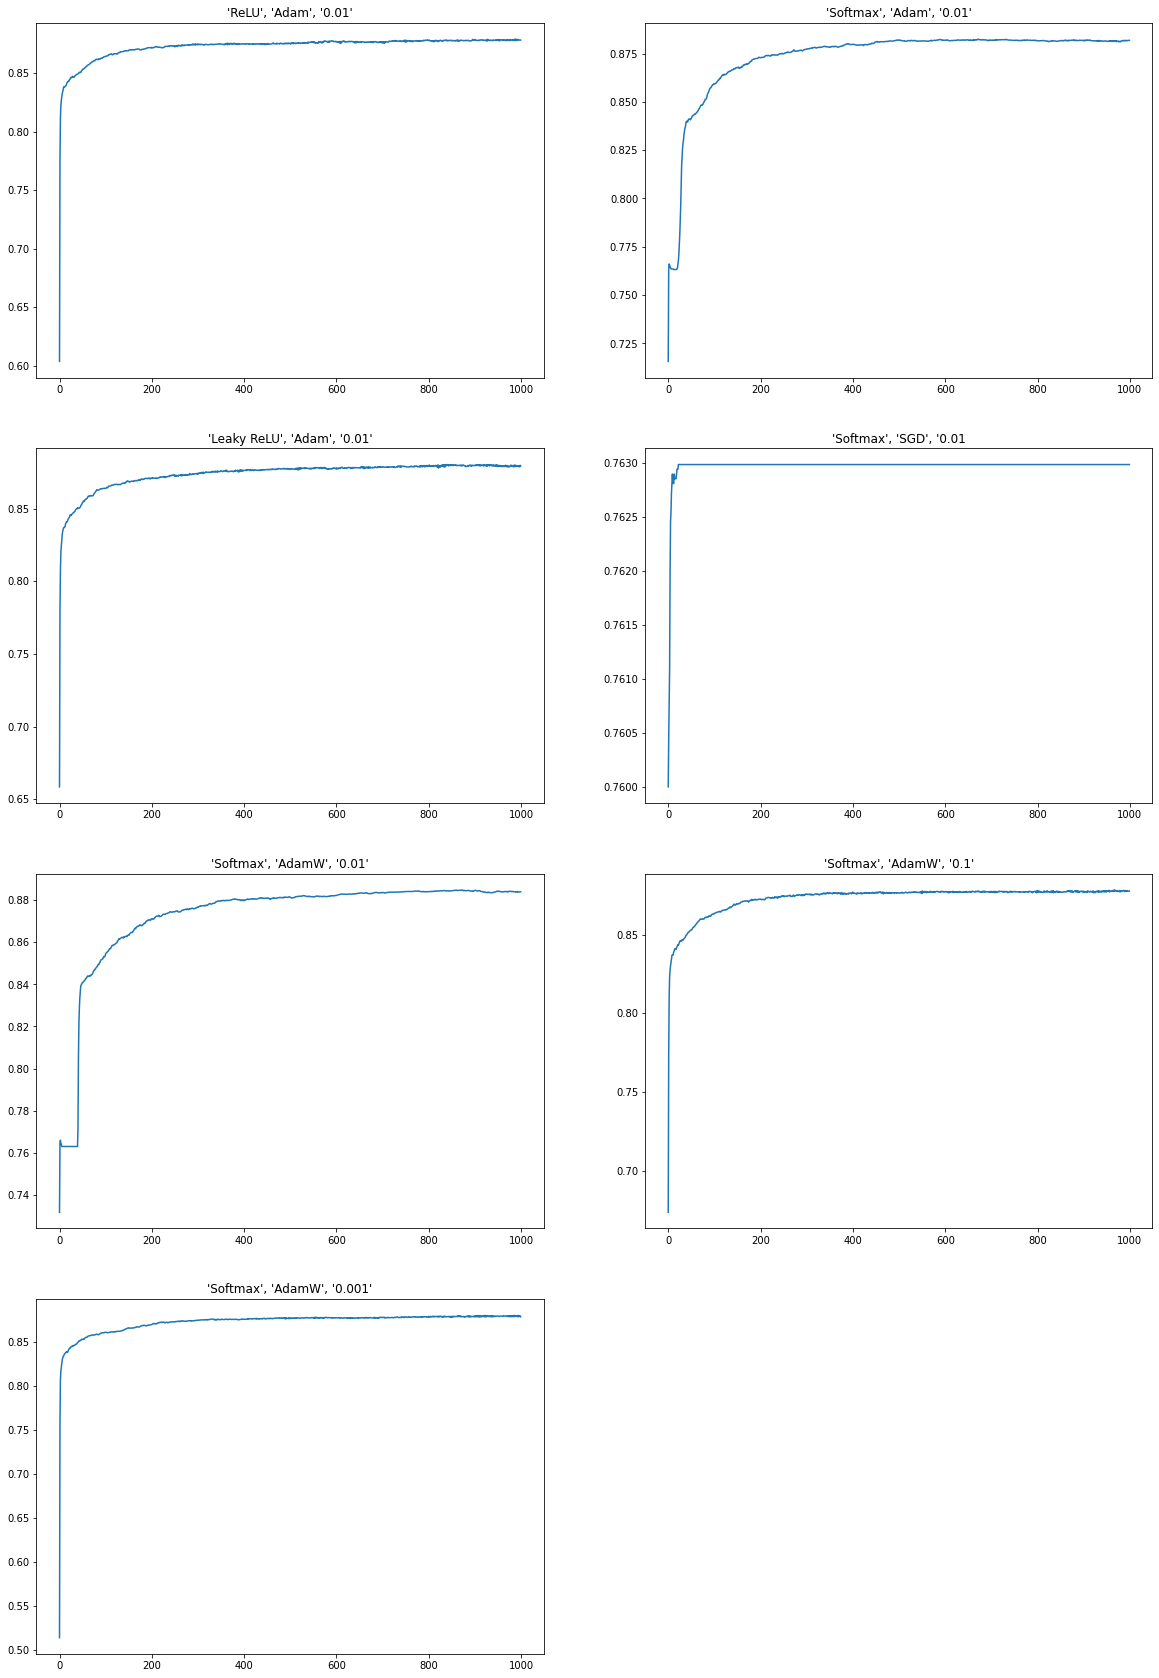

In [407]:
plt.figure(figsize=(20,30))

plt.subplot(4,2,1)
plt.plot(accuracy_per_model_graph[0])
plt.title("'ReLU', 'Adam', '0.01'")

plt.subplot(4,2,2)
plt.plot(accuracy_per_model_graph[1])
plt.title("'Softmax', 'Adam', '0.01'")

plt.subplot(4,2,3)
plt.plot(accuracy_per_model_graph[2])
plt.title("'Leaky ReLU', 'Adam', '0.01'")

plt.subplot(4,2,4)
plt.plot(accuracy_per_model_graph[3])
plt.title("'Softmax', 'SGD', '0.01")

plt.subplot(4,2,5)
plt.plot(accuracy_per_model_graph[4])
plt.title("'Softmax', 'AdamW', '0.01'")

plt.subplot(4,2,6)
plt.plot(accuracy_per_model_graph[5])
plt.title("'Softmax', 'AdamW', '0.1'")

plt.subplot(4,2,7)
plt.plot(accuracy_per_model_graph[6])
plt.title("'Softmax', 'AdamW', '0.001'")

plt.show()

## 3) After completing step 2, choose a model setup that returns the best accuracy and use it as a ‘base’ model. In deep learning frameworks, there is a number of new methods appears, that help to increase the training speed, accuracy, etc. Find and try at least 4 different methods

### The model with the best accuracy is Activation Function -> Softmax, Optimizer -> AdamW, Learning Rate -> 0.01 with an Accuracy -> 88.39%

In [556]:
print("Accuracy: ",accuracy_per_model[4])

Accuracy:  0.883950508950509


In [557]:
hiddenSize = 20
numClasses = 2
numEpisodes = 1000
batchSize = 100
learningRate = 0.01

In [558]:
class NeuralNet(nn.Module):
    def __init__(self, InputSize, hiddenSize, numClasses):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(InputSize, hiddenSize)   
        self.out = nn.Linear(hiddenSize, numClasses)  

    def forward(self, x):
        x = nn.functional.softmax(self.hidden(x))    
        x = self.out(x)
        return x

In [559]:
model = NeuralNet(InputSize,hiddenSize, numClasses)
optimizer = torch.optim.AdamW(model.parameters(), lr = learningRate)
loss = nn.CrossEntropyLoss()

### Step 1: Early Stopping

In [560]:
x_train_es, x_val_es, y_train_es, y_val_es = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [561]:
xtrain_es = torch.from_numpy(x_train_es)
ytrain_es = torch.tensor(y_train_es.values)
xval_es = torch.from_numpy(x_val_es)
yval_es = torch.tensor(y_val_es.values)

In [562]:
def train(model, numEpisodes, optimizer, loss, xtrain_es, ytrain_es, xval_es, yval_es):
    last_loss = 100
    accuracy_list_es = []

    for episode in range(numEpisodes):
        model.train()
        
        out = model(xtrain_es)         
        lss = loss(out, ytrain_es)     
        optimizer.zero_grad()   
        lss.backward()
        optimizer.step()
        
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy()
        target_y = ytrain_es.data.numpy()
        accuracy_es = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)

        accuracy_list_es.append(accuracy_es)

        current_loss = validate(model, xval_es, yval_es, loss)
        if current_loss > last_loss:
            trigger_times += 1

            if trigger_times >= patience:
                return model

        else:
            trigger_times = 0

        last_loss = current_loss

    return accuracy_es, accuracy_list_es

In [563]:
def validate(model, xval_es, yval_es, loss):
    model.eval()
    loss_total = 0
    with torch.no_grad():
        out = model(xval_es)
        lss = loss(out, yval_es)
        loss_total += lss.detach().numpy()
        
    loss_total = len(loss_list)/len(xval_es)
    return loss_total

In [564]:
accuracy_es, accuracy_list_es = train(model, numEpisodes, optimizer, loss, xtrain_es, ytrain_es, xval_es, yval_es)

/Users/volkopat/opt/anaconda3/envs/py2/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



In [565]:
print("Accuracy for Base Model", accuracy_per_model[4])
print("Accuracy after Early Stopping", accuracy_es)

Accuracy for Base Model 0.883950508950509
Accuracy after Early Stopping 0.885208139088466


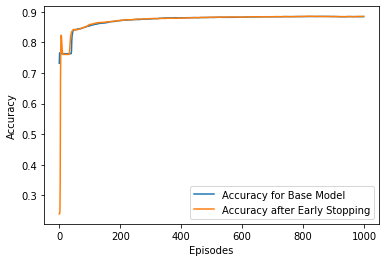

In [566]:
plt.plot(accuracy_per_model_graph[4], label="Accuracy for Base Model")
plt.plot(accuracy_list_es, label="Accuracy after Early Stopping")
plt.xlabel("Episodes")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Method 2: Increasing number of Hidden Nodes from 20 to 30

In [580]:
class NeuralNet(nn.Module):
    def __init__(self, InputSize, hiddenSize, numClasses):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(InputSize, hiddenSize)   
        self.out = nn.Linear(hiddenSize, numClasses)  

    def forward(self, x):
        x = activation[1](self.hidden(x))    
        x = self.out(x)
        return x
    
model = NeuralNet(InputSize,30, numClasses)
optimizer = optimizer_list[2](model.parameters(), lr = learningRate)
loss = nn.CrossEntropyLoss()

accuracy_list_lr = []
for episode in range(numEpisodes):
    out = model(xtrain)         
    lss = loss(out, ytrain)     

    optimizer.zero_grad()   
    lss.backward()
    optimizer.step()
    
    prediction = torch.max(out, 1)[1]
    pred_y = prediction.data.numpy()
    target_y = ytrain.data.numpy()
    accuracy_lr = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
    
    accuracy_list_lr.append(accuracy_lr)

/Users/volkopat/opt/anaconda3/envs/py2/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



In [586]:
print("Accuracy for Base Model", accuracy_per_model[4])
print("Accuracy after increasing Hidden Nodes", accuracy_lr)

Accuracy for Base Model 0.883950508950509
Accuracy after increasing Hidden Nodes 0.8855300105300106


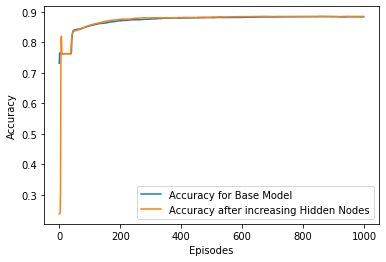

In [587]:
plt.plot(accuracy_per_model_graph[4], label="Accuracy for Base Model")
plt.plot(accuracy_list_lr, label="Accuracy after increasing Hidden Nodes")
plt.xlabel("Episodes")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Method 3: Increasing Number of Hidden Layers

In [583]:
class NeuralNet(nn.Module):
    def __init__(self, InputSize, hiddenSize, numClasses):
        super(NeuralNet, self).__init__()
        self.hidden1 = nn.Linear(InputSize, hiddenSize)
        self.hidden2 = nn.Linear(hiddenSize, hiddenSize)
        self.out = nn.Linear(hiddenSize, numClasses)  

    def forward(self, x):
        x = activation[1](self.hidden1(x))    
        x = activation[1](self.hidden2(x)) 
        x = self.out(x)
        return x
    
model = NeuralNet(InputSize,hiddenSize, numClasses)
optimizer = optimizer_list[2](model.parameters(), lr = learningRate)
loss = nn.CrossEntropyLoss()

accuracy_list_hl = []
for episode in range(numEpisodes):
    out = model(xtrain)         
    lss = loss(out, ytrain)     

    optimizer.zero_grad()   
    lss.backward()
    optimizer.step()
    
    prediction = torch.max(out, 1)[1]
    pred_y = prediction.data.numpy()
    target_y = ytrain.data.numpy()
    accuracy_hl = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
    
    accuracy_list_hl.append(accuracy_hl)

/Users/volkopat/opt/anaconda3/envs/py2/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

/Users/volkopat/opt/anaconda3/envs/py2/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



In [584]:
print("Accuracy for Base Model", accuracy_per_model[4])
print("Accuracy after doubling Hidden Layers", accuracy_hl)

Accuracy for Base Model 0.883950508950509
Accuracy after doubling Hidden Layers 0.8868023868023868


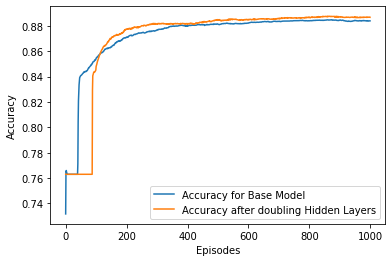

In [585]:
plt.plot(accuracy_per_model_graph[4], label="Accuracy for Base Model")
plt.plot(accuracy_list_hl, label="Accuracy after doubling Hidden Layers")
plt.xlabel("Episodes")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Method 4: Adding Learning Rate Scheduler.

In [621]:
class NeuralNet(nn.Module):
    def __init__(self, InputSize, hiddenSize, numClasses):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(InputSize, hiddenSize)   
        self.out = nn.Linear(hiddenSize, numClasses)  

    def forward(self, x):
        x = activation[1](self.hidden(x))  
        x = self.out(x)
        return x
    
model = NeuralNet(InputSize,hiddenSize, numClasses)
optimizer = optimizer_list[2](model.parameters(), lr = learningRate)
loss = nn.CrossEntropyLoss()

lam = lambda epoch: 0.99999999 ** epoch
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lam)

accuracy_list_drop = []
for episode in range(numEpisodes):
    out = model(xtrain)         
    lss = loss(out, ytrain)     

    optimizer.zero_grad()   
    lss.backward()
    optimizer.step()
    scheduler.step()
    
    prediction = torch.max(out, 1)[1]
    pred_y = prediction.data.numpy()
    target_y = ytrain.data.numpy()
    accuracy_drop = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
    
    accuracy_list_drop.append(accuracy_drop)

/Users/volkopat/opt/anaconda3/envs/py2/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



In [622]:
print("Accuracy for Base Model", accuracy_per_model[4])
print("Accuracy after adding LambdaLR", accuracy_drop)

Accuracy for Base Model 0.883950508950509
Accuracy after adding LambdaLR 0.879914004914005


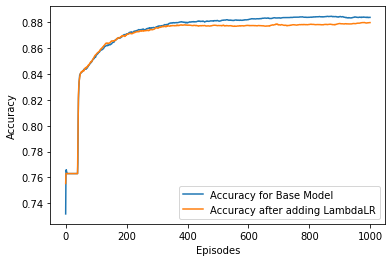

In [623]:
plt.plot(accuracy_per_model_graph[4], label="Accuracy for Base Model")
plt.plot(accuracy_list_drop, label="Accuracy after adding LambdaLR")
plt.xlabel("Episodes")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Part III: Building a CNN

## 1) Load, preprocess, analyze the dataset and make it ready for training.

In [4]:
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization, Conv2D, MaxPooling2D

In [5]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [822]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [823]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [824]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## 2) Build and train a basic CNN(with max 3 hidden layers).

In [825]:
model = Sequential()
x_shape = x_train.shape[1:]

model.add(Conv2D(32, kernel_size = (3, 3), input_shape = x_shape, kernel_initializer='he_normal', activation = "relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = "relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, kernel_size = (3, 3), activation = "relu"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation = 'softmax'))
print(model.summary())

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 128)             

In [826]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [827]:
history = model.fit(x_train, y_train, epochs = 10 , batch_size = 128, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 96s 2ms/sample - loss: 0.6469 - accuracy: 0.7678 - val_loss: 0.4895 - val_accuracy: 0.8217
Epoch 2/10
48000/48000 [==============================] - 95s 2ms/sample - loss: 0.4087 - accuracy: 0.8519 - val_loss: 0.3914 - val_accuracy: 0.8599
Epoch 3/10
48000/48000 [==============================] - 95s 2ms/sample - loss: 0.3559 - accuracy: 0.8706 - val_loss: 0.3601 - val_accuracy: 0.8692
Epoch 4/10
48000/48000 [==============================] - 95s 2ms/sample - loss: 0.3197 - accuracy: 0.8823 - val_loss: 0.3439 - val_accuracy: 0.8740
Epoch 5/10
48000/48000 [==============================] - 95s 2ms/sample - loss: 0.2890 - accuracy: 0.8944 - val_loss: 0.3617 - val_accuracy: 0.8692
Epoch 6/10
48000/48000 [==============================] - 98s 2ms/sample - loss: 0.2734 - accuracy: 0.8992 - val_loss: 0.3182 - val_accuracy: 0.8848
Epoch 7/10
48000/48000 [==============================] 

Text(0.5, 1.0, 'Accuracy Curves')

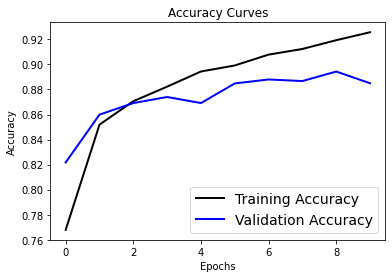

In [828]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

## 3) Add all the improvement methods that you tried for “PartII Step3” of this assignment, that are applicable to CNN architecture (e.g. earlystopping).

### Step 1: Early Stopping

In [6]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="accuracy")

In [830]:
history_es = model.fit(x_train, y_train, epochs = 10 , batch_size = 128, validation_split = 0.2, callbacks = [early_stopping])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 96s 2ms/sample - loss: 0.1867 - accuracy: 0.9304 - val_loss: 0.3247 - val_accuracy: 0.8897
Epoch 2/10
48000/48000 [==============================] - 97s 2ms/sample - loss: 0.1727 - accuracy: 0.9351 - val_loss: 0.3085 - val_accuracy: 0.8966
Epoch 3/10
48000/48000 [==============================] - 98s 2ms/sample - loss: 0.1596 - accuracy: 0.9415 - val_loss: 0.3180 - val_accuracy: 0.8958
Epoch 4/10
48000/48000 [==============================] - 98s 2ms/sample - loss: 0.1418 - accuracy: 0.9478 - val_loss: 0.3248 - val_accuracy: 0.8966
Epoch 5/10
48000/48000 [==============================] - 97s 2ms/sample - loss: 0.1322 - accuracy: 0.9517 - val_loss: 0.3346 - val_accuracy: 0.8894
Epoch 6/10
48000/48000 [==============================] - 97s 2ms/sample - loss: 0.1257 - accuracy: 0.9533 - val_loss: 0.3515 - val_accuracy: 0.8928
Epoch 7/10
48000/48000 [==============================] 

Text(0.5, 1.0, 'Accuracy Curves')

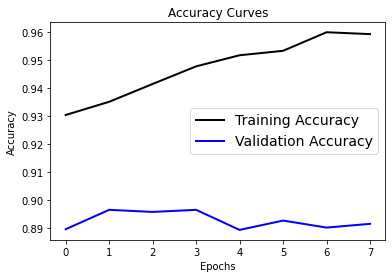

In [831]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history_es.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history_es.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

### Step 2: Increasing number of Hidden Nodes

In [832]:
model1 = Sequential()
x_shape = x_train.shape[1:]

model1.add(Conv2D(64, kernel_size = (3, 3), input_shape = x_shape, kernel_initializer='he_normal', activation = "relu"))
model1.add(MaxPooling2D((2,2)))

model1.add(Conv2D(128, kernel_size = (3, 3), activation = "relu"))
model1.add(MaxPooling2D((2,2)))

model1.add(Conv2D(256, kernel_size = (3, 3), activation = "relu"))
model1.add(MaxPooling2D((2,2)))

model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(10, activation = 'softmax'))
print(model1.summary())

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 3, 3, 256)         295168    
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 256)             

In [833]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [834]:
history_hl = model1.fit(x_train, y_train, epochs = 10 , batch_size = 128, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 212s 4ms/sample - loss: 0.5512 - accuracy: 0.8004 - val_loss: 0.4096 - val_accuracy: 0.8493
Epoch 2/10
48000/48000 [==============================] - 212s 4ms/sample - loss: 0.3664 - accuracy: 0.8657 - val_loss: 0.3404 - val_accuracy: 0.8759
Epoch 3/10
48000/48000 [==============================] - 214s 4ms/sample - loss: 0.3059 - accuracy: 0.8866 - val_loss: 0.3332 - val_accuracy: 0.8773
Epoch 4/10
48000/48000 [==============================] - 212s 4ms/sample - loss: 0.2668 - accuracy: 0.9023 - val_loss: 0.3037 - val_accuracy: 0.8891
Epoch 5/10
48000/48000 [==============================] - 211s 4ms/sample - loss: 0.2331 - accuracy: 0.9133 - val_loss: 0.2861 - val_accuracy: 0.8950
Epoch 6/10
48000/48000 [==============================] - 212s 4ms/sample - loss: 0.2094 - accuracy: 0.9224 - val_loss: 0.2913 - val_accuracy: 0.8965
Epoch 7/10
48000/48000 [==========================

Text(0.5, 1.0, 'Accuracy Curves')

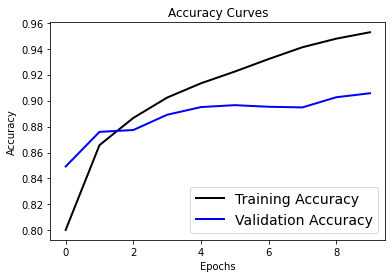

In [835]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history_hl.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history_hl.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

### Step 3: Increasing number of Hidden Layers

In [836]:
model2 = Sequential()
x_shape = x_train.shape[1:]

model2.add(Conv2D(32, kernel_size = (3, 3), input_shape = x_shape, kernel_initializer='he_normal', activation = "relu"))
model2.add(Conv2D(32, kernel_size = (3, 3), activation = "relu"))
model2.add(MaxPooling2D((2,2)))

model2.add(Conv2D(64, kernel_size = (3, 3), activation = "relu"))
model2.add(Conv2D(64, kernel_size = (3, 3), activation = "relu"))
model2.add(MaxPooling2D((2,2)))

model2.add(Conv2D(128, kernel_size = (3, 3), activation = "relu"))
model2.add(MaxPooling2D((2,2)))

model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(10, activation = 'softmax'))
print(model2.summary())

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 2, 2, 128)       

In [837]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [838]:
history_Il = model2.fit(x_train, y_train, epochs = 10 , batch_size = 128, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 182s 4ms/sample - loss: 0.5870 - accuracy: 0.7836 - val_loss: 0.3692 - val_accuracy: 0.8632
Epoch 2/10
48000/48000 [==============================] - 183s 4ms/sample - loss: 0.3512 - accuracy: 0.8704 - val_loss: 0.3292 - val_accuracy: 0.8799
Epoch 3/10
48000/48000 [==============================] - 181s 4ms/sample - loss: 0.2897 - accuracy: 0.8941 - val_loss: 0.2807 - val_accuracy: 0.8969
Epoch 4/10
48000/48000 [==============================] - 181s 4ms/sample - loss: 0.2558 - accuracy: 0.9055 - val_loss: 0.2822 - val_accuracy: 0.8961
Epoch 5/10
48000/48000 [==============================] - 181s 4ms/sample - loss: 0.2311 - accuracy: 0.9144 - val_loss: 0.2494 - val_accuracy: 0.9091
Epoch 6/10
48000/48000 [==============================] - 179s 4ms/sample - loss: 0.2037 - accuracy: 0.9246 - val_loss: 0.2568 - val_accuracy: 0.9091
Epoch 7/10
48000/48000 [==========================

Text(0.5, 1.0, 'Accuracy Curves')

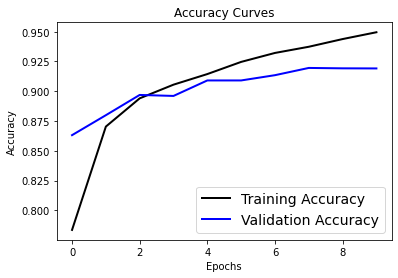

In [839]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history_Il.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history_Il.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

## 4) Test your NN on the testing dataset.

In [873]:
evaluate = model1.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# Part IV: Optimizing CNN + Data Argumentation

## 1) Changing Activation Function, Optimizer -> Adam, Dropout -> No Dropout, Activation Function -> Softmax

In [874]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [875]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [876]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [877]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [878]:
model_odf1 = Sequential()
x_shape = x_train.shape[1:]

model_odf1.add(Conv2D(32, kernel_size = (3, 3), input_shape = x_shape, kernel_initializer='he_normal', activation = "softmax"))
model_odf1.add(MaxPooling2D((2,2)))

model_odf1.add(Conv2D(64, kernel_size = (3, 3), activation = "softmax"))
model_odf1.add(MaxPooling2D((2,2)))

model_odf1.add(Conv2D(128, kernel_size = (3, 3), activation = "softmax"))
model_odf1.add(MaxPooling2D((2,2)))

model_odf1.add(Flatten())
model_odf1.add(Dense(128, activation='softmax'))
model_odf1.add(Dense(10, activation = 'softmax'))
print(model_odf1.summary())

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 128)             

In [879]:
model_odf1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [880]:
history_odf1 = model_odf1.fit(x_train, y_train, epochs = 5 , batch_size = 128, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 174s 4ms/sample - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 2/5
48000/48000 [==============================] - 182s 4ms/sample - loss: 2.3028 - accuracy: 0.0968 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 3/5
48000/48000 [==============================] - 183s 4ms/sample - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3030 - val_accuracy: 0.0983
Epoch 4/5
48000/48000 [==============================] - 185s 4ms/sample - loss: 2.1695 - accuracy: 0.2319 - val_loss: 1.8504 - val_accuracy: 0.3621
Epoch 5/5
48000/48000 [==============================] - 187s 4ms/sample - loss: 1.5884 - accuracy: 0.4470 - val_loss: 1.3595 - val_accuracy: 0.4812


## 2) Changing Activation Function, Optimizer -> Adam, Dropout -> No Dropout, Activation Function -> Sigmoid

In [881]:
model_odf2 = Sequential()
x_shape = x_train.shape[1:]

model_odf2.add(Conv2D(32, kernel_size = (3, 3), input_shape = x_shape, kernel_initializer='he_normal', activation = "sigmoid"))
model_odf2.add(MaxPooling2D((2,2)))

model_odf2.add(Conv2D(64, kernel_size = (3, 3), activation = "sigmoid"))
model_odf2.add(MaxPooling2D((2,2)))

model_odf2.add(Conv2D(128, kernel_size = (3, 3), activation = "sigmoid"))
model_odf2.add(MaxPooling2D((2,2)))

model_odf2.add(Flatten())
model_odf2.add(Dense(128, activation='sigmoid'))
model_odf2.add(Dense(10, activation = 'softmax'))
print(model_odf2.summary())

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 128)             

In [882]:
model_odf2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [883]:
history_odf2 = model_odf2.fit(x_train, y_train, epochs = 5 , batch_size = 128, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 113s 2ms/sample - loss: 1.3679 - accuracy: 0.5161 - val_loss: 0.7694 - val_accuracy: 0.7265
Epoch 2/5
48000/48000 [==============================] - 110s 2ms/sample - loss: 0.7090 - accuracy: 0.7395 - val_loss: 0.6478 - val_accuracy: 0.7567
Epoch 3/5
48000/48000 [==============================] - 116s 2ms/sample - loss: 0.6152 - accuracy: 0.7722 - val_loss: 0.5722 - val_accuracy: 0.7897
Epoch 4/5
48000/48000 [==============================] - 116s 2ms/sample - loss: 0.5641 - accuracy: 0.7910 - val_loss: 0.5402 - val_accuracy: 0.7998
Epoch 5/5
48000/48000 [==============================] - 117s 2ms/sample - loss: 0.5329 - accuracy: 0.8014 - val_loss: 0.5150 - val_accuracy: 0.8085


## 3) Changing Optimizer, Optimizer -> SGD, Dropout -> No Dropout, Activation Function -> ReLU

In [884]:
model_odf3 = Sequential()
x_shape = x_train.shape[1:]

model_odf3.add(Conv2D(32, kernel_size = (3, 3), input_shape = x_shape, kernel_initializer='he_normal', activation = "relu"))
model_odf3.add(MaxPooling2D((2,2)))

model_odf3.add(Conv2D(64, kernel_size = (3, 3), activation = "relu"))
model_odf3.add(MaxPooling2D((2,2)))

model_odf3.add(Conv2D(128, kernel_size = (3, 3), activation = "relu"))
model_odf3.add(MaxPooling2D((2,2)))

model_odf3.add(Flatten())
model_odf3.add(Dense(128, activation='relu'))
model_odf3.add(Dense(10, activation = 'relu'))
print(model_odf3.summary())

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_85 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 128)             

In [885]:
model_odf3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [886]:
history_odf3 = model_odf3.fit(x_train, y_train, epochs = 5 , batch_size = 128, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 102s 2ms/sample - loss: 8.9662 - accuracy: 0.1457 - val_loss: 8.8517 - val_accuracy: 0.0999
Epoch 2/5
48000/48000 [==============================] - 101s 2ms/sample - loss: 7.9409 - accuracy: 0.2203 - val_loss: 8.6868 - val_accuracy: 0.0995
Epoch 3/5
48000/48000 [==============================] - 95s 2ms/sample - loss: nan - accuracy: 0.1583 - val_loss: nan - val_accuracy: 0.1030
Epoch 4/5
48000/48000 [==============================] - 93s 2ms/sample - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 5/5
48000/48000 [==============================] - 94s 2ms/sample - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030


## 4) Changing Optimizer, Optimizer -> Adam, Dropout -> No Dropout, Activation Function -> RMSProp

In [887]:
model_odf4 = Sequential()
x_shape = x_train.shape[1:]

model_odf4.add(Conv2D(32, kernel_size = (3, 3), input_shape = x_shape, kernel_initializer='he_normal', activation = "relu"))
model_odf4.add(MaxPooling2D((2,2)))

model_odf4.add(Conv2D(64, kernel_size = (3, 3), activation = "relu"))
model_odf4.add(MaxPooling2D((2,2)))

model_odf4.add(Conv2D(128, kernel_size = (3, 3), activation = "relu"))
model_odf4.add(MaxPooling2D((2,2)))

model_odf4.add(Flatten())
model_odf4.add(Dense(128, activation='relu'))
model_odf4.add(Dense(10, activation = 'relu'))
print(model_odf4.summary())

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_88 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 128)             

In [888]:
model_odf4.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [889]:
history_odf4 = model_odf4.fit(x_train, y_train, epochs = 5 , batch_size = 128, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 99s 2ms/sample - loss: nan - accuracy: 0.1303 - val_loss: nan - val_accuracy: 0.1030
Epoch 2/5
48000/48000 [==============================] - 98s 2ms/sample - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 3/5
48000/48000 [==============================] - 90s 2ms/sample - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 4/5
48000/48000 [==============================] - 90s 2ms/sample - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 5/5
48000/48000 [==============================] - 89s 2ms/sample - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030


## 5) Changing Optimizer, Optimizer -> Adam, Dropout -> 0.2, Activation Function -> ReLU

In [890]:
model_odf5 = Sequential()
x_shape = x_train.shape[1:]

model_odf5.add(Conv2D(32, kernel_size = (3, 3), input_shape = x_shape, kernel_initializer='he_normal', activation = "relu"))
model_odf5.add(MaxPooling2D((2,2)))
model_odf5.add(Dropout(0.2))

model_odf5.add(Conv2D(64, kernel_size = (3, 3), activation = "relu"))
model_odf5.add(MaxPooling2D((2,2)))
model_odf5.add(Dropout(0.2))

model_odf5.add(Conv2D(128, kernel_size = (3, 3), activation = "relu"))
model_odf5.add(MaxPooling2D((2,2)))
model_odf5.add(Dropout(0.2))

model_odf5.add(Flatten())
model_odf5.add(Dense(128, activation='relu'))
model_odf5.add(Dense(10, activation = 'relu'))
print(model_odf5.summary())

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 3, 3, 128)       

In [891]:
model_odf5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [893]:
history_odf5 = model_odf5.fit(x_train, y_train, epochs = 5 , batch_size = 128, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 100s 2ms/sample - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 2/5
48000/48000 [==============================] - 104s 2ms/sample - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 3/5
48000/48000 [==============================] - 99s 2ms/sample - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 4/5
48000/48000 [==============================] - 100s 2ms/sample - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 5/5
48000/48000 [==============================] - 101s 2ms/sample - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030


## 6) Changing Optimizer, Optimizer -> Adam, Dropout -> 0.3, Activation Function -> ReLU

In [894]:
model_odf6 = Sequential()
x_shape = x_train.shape[1:]

model_odf6.add(Conv2D(32, kernel_size = (3, 3), input_shape = x_shape, kernel_initializer='he_normal', activation = "relu"))
model_odf6.add(MaxPooling2D((2,2)))
model_odf6.add(Dropout(0.3))

model_odf6.add(Conv2D(64, kernel_size = (3, 3), activation = "relu"))
model_odf6.add(MaxPooling2D((2,2)))
model_odf6.add(Dropout(0.3))

model_odf6.add(Conv2D(128, kernel_size = (3, 3), activation = "relu"))
model_odf6.add(MaxPooling2D((2,2)))
model_odf6.add(Dropout(0.3))

model_odf6.add(Flatten())
model_odf6.add(Dense(128, activation='relu'))
model_odf6.add(Dense(10, activation = 'relu'))
print(model_odf6.summary())

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 3, 3, 128)       

In [895]:
model_odf6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [896]:
history_odf6 = model_odf6.fit(x_train, y_train, epochs = 5 , batch_size = 128, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 109s 2ms/sample - loss: nan - accuracy: 0.2665 - val_loss: nan - val_accuracy: 0.1030
Epoch 2/5
48000/48000 [==============================] - 102s 2ms/sample - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 3/5
48000/48000 [==============================] - 102s 2ms/sample - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 4/5
48000/48000 [==============================] - 103s 2ms/sample - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 5/5
48000/48000 [==============================] - 102s 2ms/sample - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030


In [897]:
setups = {
    'Setup 1':['ReLU', 'Adam', 'No Dropout', history.history['accuracy'][-1]],
    'Setup 2':['Softmax', 'Adam', 'No Dropout', history_odf1.history['accuracy'][-1]],
    'Setup 3':['Sigmoid', 'Adam', 'No Dropout', history_odf2.history['accuracy'][-1]],
    'Setup 4':['ReLU', 'SGD', 'No Dropout', history_odf3.history['accuracy'][-1]],
    'Setup 5':['ReLU', 'RMS Prop', 'No Dropout', history_odf4.history['accuracy'][-1]],
    'Setup 6':['ReLU', 'Adam', '0.2', history_odf5.history['accuracy'][-1]],
    'Setup 7':['ReLU', 'Adam', '0.3', history_odf6.history['accuracy'][-1]],
}

setups_df = pd.DataFrame(setups, index =['Activation Function', 'Optimizer', 'Dropout', 'Accuracy'])

In [898]:
setups_df

,Setup 1,Setup 2,Setup 3,Setup 4,Setup 5,Setup 6,Setup 7
Activation Function,ReLU,Softmax,Sigmoid,ReLU,ReLU,ReLU,ReLU
Optimizer,Adam,Adam,Adam,SGD,RMS Prop,Adam,Adam
Dropout,No Dropout,No Dropout,No Dropout,No Dropout,No Dropout,0.2,0.3
Accuracy,0.925729,0.446958,0.801354,0.09925,0.09925,0.09925,0.09925


# 3) Increase the dataset by x4 using any data augmentation techniques(rotations, shifting, mirroring, etc).

In [8]:
from keras_preprocessing.image.affine_transformations import random_rotation
from keras_preprocessing.image import ImageDataGenerator

In [9]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [10]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [11]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
onehot_encoder = OneHotEncoder(drop='first',sparse=False)
yTrainEncoded = onehot_encoder.fit_transform(y_train)
yTestEncoded = onehot_encoder.fit_transform(y_test)

In [14]:
rotateData = ImageDataGenerator(rotation_range=90)
changeDataTrain = rotateData.flow(x_train, yTrainEncoded, batch_size=x_train.shape[0])
changeDataTest = rotateData.flow(x_test, yTestEncoded, batch_size=x_test.shape[0])

In [15]:
xTrain90 = np.copy(x_train)
yTrain90 = np.copy(yTrainEncoded)
xTest90 = np.copy(x_test)
yTest90 = np.copy(yTestEncoded)

In [16]:
for i in range(3):
    newTrainImages = changeDataTrain.next()
    xTrain90 = np.concatenate((xTrain90, newTrainImages[0]))
    yTrain90 = np.concatenate((yTrain90, newTrainImages[1]))
    newTestImages = changeDataTest.next()
    xTest90 = np.concatenate((xTest90, newTestImages[0]))
    yTest90 = np.concatenate((yTest90, newTestImages[1]))

In [17]:
model_aug = Sequential()
x_shape = x_train.shape[1:]

model_aug.add(Conv2D(32, kernel_size = (3, 3), input_shape = x_shape, kernel_initializer='he_normal', activation = "relu"))
model_aug.add(MaxPooling2D((2,2)))

model_aug.add(Conv2D(64, kernel_size = (3, 3), activation = "relu"))
model_aug.add(MaxPooling2D((2,2)))

model_aug.add(Conv2D(128, kernel_size = (3, 3), activation = "relu"))
model_aug.add(MaxPooling2D((2,2)))

model_aug.add(Flatten())
model_aug.add(Dense(128, activation='relu'))
model_aug.add(Dense(10, activation = 'softmax'))
print(model_aug.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________

In [18]:
model_aug.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history_aug = model_aug.fit(xTrain90, yTrain90, epochs = 10 , batch_size = 128, validation_split = 0.2)

Train on 192000 samples, validate on 48000 samples
Epoch 1/10
192000/192000 [==============================] - 37s 190us/sample - loss: 0.7538 - acc: 0.7266 - val_loss: 0.6351 - val_acc: 0.7695
Epoch 2/10
192000/192000 [==============================] - 37s 192us/sample - loss: 0.5173 - acc: 0.8128 - val_loss: 0.5559 - val_acc: 0.7964
Epoch 3/10
192000/192000 [==============================] - 37s 193us/sample - loss: 0.4479 - acc: 0.8371 - val_loss: 0.4990 - val_acc: 0.8176
Epoch 4/10
192000/192000 [==============================] - 38s 199us/sample - loss: 0.4056 - acc: 0.8518 - val_loss: 0.4573 - val_acc: 0.8340
Epoch 5/10
192000/192000 [==============================] - 38s 197us/sample - loss: 0.3749 - acc: 0.8635 - val_loss: 0.4457 - val_acc: 0.8397
Epoch 6/10
192000/192000 [==============================] - 38s 197us/sample - loss: 0.3506 - acc: 0.8714 - val_loss: 0.4115 - val_acc: 0.8510
Epoch 7/10
192000/192000 [==============================] - 37s 195us/sample - loss: 0.3288